# COGS 118B - Final Project

# Names


- Minju Lee
- Cynthia Delira
- Ke
- Kevin Su

# Abstract 
Current music recommendation algorithms only offer users vague genres such as pop, rock, or indie. These genres include many different subgenres that are unique from one another which users are left unaware of because algorithms leave them out. We propose incorporating these subgenres and creating a machine learning structure that separates music by subgenres to give users more specific suggestions.

We will be using the Spotify Track Dataset from Kaggle and extract all pop-related songs’ dataset for clustering. Each data will represent a certain aspect of the song such as tempo, energy level, danceability, etc. Since most songs are already labeled with a subgenre of pop that are only based on the origin of the music, we will manual evualation as the main method of measurement for our algorithm. 

# Background

There are multiple music genre algorithms that exist, however none of them correctly classify music into sub-genres. Even the biggest music algorithm Spotify struggles with this as it is unable “to accurately gauge mood and context” <a name="mys"></a>[<sup>[2]</sup>](#mystery) which is crucial to identifying sub-genres. The issue with Spotify is that it utilizes K-Means clustering which requires previous knowledge of the number of clusters to create, making it difficult for the algorithm to identify sub-genres <a name="stern"></a>[<sup>[1]</sup>](#sternNote). Without sub-genres, algorithms cluster music into large, vague groups and end up recommending popular songs/artists instead of niche, underrated music <a name="mys"></a>[<sup>[2]</sup>](#mystery). Classifying music into sub-genres is important as it allows the user to find a wider variety of music and breaks them out of an echo chamber of the same type of music that everyone listens to <a name="mys"></a>[<sup>[2]</sup>](#mystery). 
Instead of K-Means clustering, we propose to use hierarchical clustering which is a “bottom-up” approach that initializes each observation as its own cluster and merged clusters move up the hierarchy. This approach requires no previous knowledge of the cluster count which allows us to evaluate sub-genres and the closeness of any two genres <a name="mys"></a>[<sup>[2]</sup>](#mystery). Our method will separate the giant genre of pop music into sub-genres based on tempo, energy level, danceability, etc. from the dataset we found. 

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

# Data

We will be using the Spotify Tracks dataset as found on Kaggle. This dataset has a total of 20 variables with an approximate of 114k observations. The observations consist of different features of each song in the data. These features are the variables that include instrumental details on the songs like tempo, acousticness, instrumentalness. The tempo is considered a critical variable as it tracks the beats per minute(BPM) and is important when clustering songs that have similar tempo as well as danceability. Danceability gives a rating from 0.0(least danceable) to 1.0(most danceable) where a song’s tempo, rhythmic stability, beat strength, and overall regularity are used to determine how suitable the song is for a dance setting. This is a critical variable as one does not want to listen to a song with no danceability and then jumbo to one of the most danceable songs with a fast tempo. Other variables like loudness, valence, and danceability are important to take into account as it shows all the different characteristics of the song. 

To better handle the data we will clean the data in order to only cluster songs in a specific genre which is pop and we will do this by removing any song which its sub genre does not include the phrase “pop” which we can then assume the genre is an entirely different genre other than pop. By doing so we are reducing the number of data and also reducing all the different 125 genres that are in the dataset. Despite this cleaning, since the dataset is large we will still have sufficient data to work with.

Data Source: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn.cluster as cluster
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [8]:
df = pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [10]:
df = df.drop(columns=['Unnamed: 0','track_id','artists','album_name','track_name','popularity','duration_ms','explicit',])
df_pop = df[df['track_genre'].str.contains('pop')]
genres = df_pop['track_genre'].unique()
df_pop = df_pop.drop(columns=['track_genre'])
df_pop.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
12000,0.576,0.505,11,-13.070,0,0.0392,0.753,0.199000,0.151,0.570,127.025,4
12001,0.577,0.228,11,-14.684,1,0.0306,0.834,0.000805,0.384,0.161,119.035,4
12002,0.641,0.479,4,-15.395,1,0.0443,0.732,0.059800,0.115,0.301,121.974,4
12003,0.613,0.210,5,-15.309,1,0.0309,0.769,0.000477,0.139,0.268,132.035,4
12004,0.646,0.370,0,-10.980,1,0.0351,0.825,0.000005,0.090,0.465,129.914,4


In [13]:
X = df_pop.to_numpy().T
X = preprocessing.normalize(X)
X

array([[0.01018033, 0.010198  , 0.01132915, ..., 0.0124603 , 0.01122311,
        0.01041009],
       [0.00810218, 0.00365802, 0.00768504, ..., 0.01012372, 0.01463206,
        0.01495294],
       [0.01828936, 0.01828936, 0.00665068, ..., 0.00332534, 0.0166267 ,
        0.00665068],
       ...,
       [0.01088359, 0.00307414, 0.0057473 , ..., 0.01855939, 0.01420595,
        0.00742757],
       [0.0105863 , 0.00992041, 0.01016535, ..., 0.01310901, 0.01041045,
        0.01033453],
       [0.01070054, 0.01070054, 0.01070054, ..., 0.01070054, 0.01070054,
        0.01070054]])

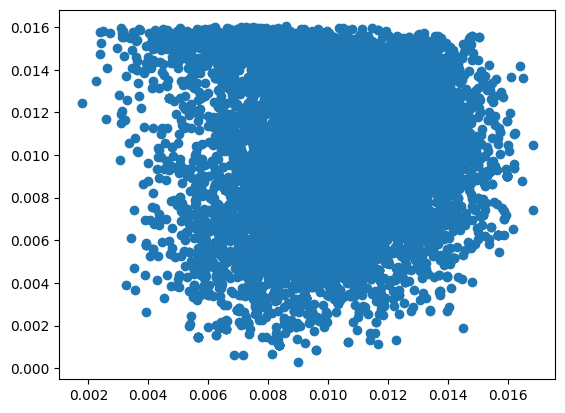

In [14]:
plt.scatter(X[0,:], X[1,:])

Our data has 12 variables or in other words 12 dimensions. Our data has too many dimensions for Kmeans so we need to compress it. We will perform PCA with 2 principle components to achieve this.

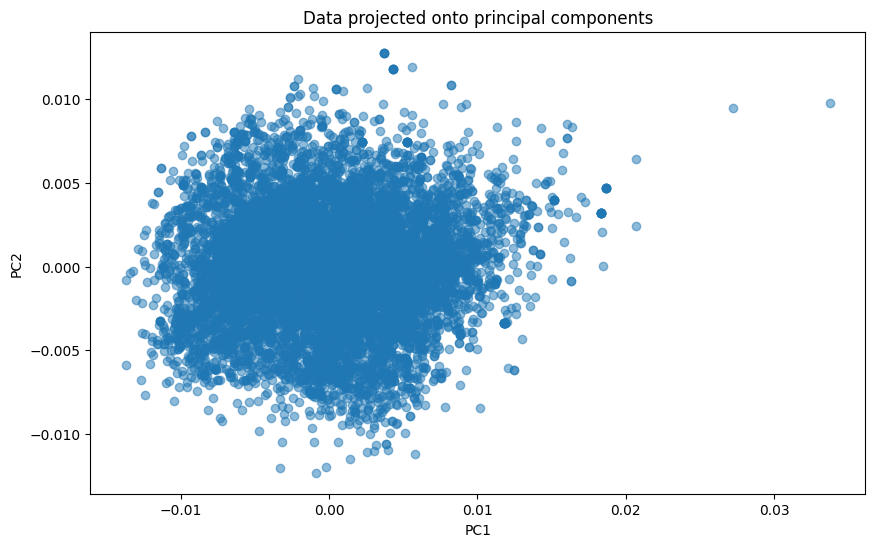

In [15]:
#PCA w/2 PC
mu = np.mean(X, axis=1, keepdims=True)
Z = X - mu
n = X.shape[1]
Sigma = (Z @ Z.T) / n

eigenvalues,eigenvectors = np.linalg.eigh(Sigma)

Z_projected = eigenvectors @ Z
eigenvalues[eigenvalues<0]=0

plt.figure(figsize=(10, 6))
plt.scatter(Z_projected[0, :], Z_projected[1, :], alpha=0.5)
plt.title("Data projected onto principal components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Now that we have compressed our data, we can perform Kmeans on it using the KMeans tool from sklearn.

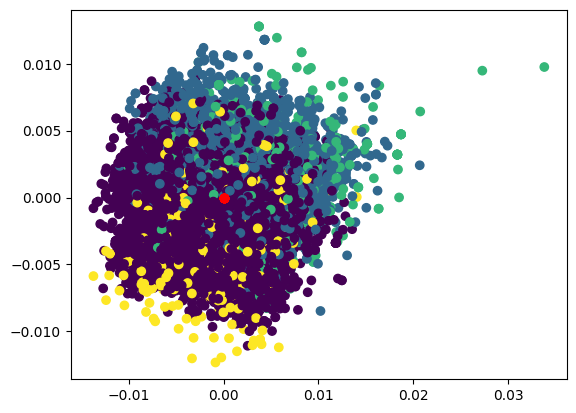

In [17]:
#using KMeans from sklearn to create 4 clusters
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X.T)

#plotting clusters of PCA
plt.scatter(Z_projected[0, :], Z_projected[1, :], c=label)

#plotting centers of PCA clusters
centers = kmeans.cluster_centers_
centers = centers * eigenvalues
plt.scatter(centers[0, :], centers[1, :], c='red')

# Proposed Solution


To further classify the sub-genre of a genre of music, which in this case is “pop”,  we will utilize the dataset on songs from Kaggle that were extracted through the Spotify API. Since some variables such as song length are not as representative as other features such as BPM, it’s important to select the most indicative variables during the data cleaning process. Because the dataset has a total of 20 variables, we will first proceed with dimensionality reduction to find the most optimal PCA hyperparameter to optimize data visualization and interpretation.   We will use K-means clustering as our benchmark model as it’s the most common way of clustering and vector quantization. We will use the adjust_rand_score function from scikit-learn to compare our model to the benchmark model. For most optimal algorithm selection, we will search through Gaussian mixture model clustering, hierarchical clustering, and spectral clustering for the best performance model based on our evaluation metrics that is described below. The optimal algorithm should efficiently cluster songs into different genres due to the variety and the volume of our datasets. We will utilize all the clustering algorithms described above from scikit-learn library. We will manually test the solution by randomly selecting songs from the same cluster to spot the similarity and selectings songs from different clusters to spot the difference.


# Evaluation Metrics

Due to the fact that all our results don’t have pre-existing labels, the evaluation metrics will largely depend on manual evaluation. To determine and quantify the performance of the clustering algorithm, among the four group members we have, each member will follow the same evaluation metrics. We will select two songs from each cluster group and rate it from 0 to 10 where 0 represents no similarity at all and 10 represents extremely similar. We are going to repeat this process three times for each cluster (ex: if there are 3 clusters, this process will be repeated 9 times with 9 scores). We will remove the highest and the lowest score, and take the average of the rest of the scores. Then we will select two clusters and one song from each cluster. We will rate it from 0 to 10 where 0 represents extremely similar and 10 represents extremely different. Keep repeating this process until all clusters have been compared with each other(ex: if there are 4 clusters, the process should be repeated 3! times). We will remove the highest and the lowest score, and take average for the rest of the scores, hence each team member should come out with two scores. Lastly, we will take the average of all 10 scores we have evaluated to represent the performance of the clustering algorithm. 

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
